# Cuarto desafío

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Predicción de enfermedades genéticas

En el siguiente dataset, se tiene información de pacientes pediatricos con diferentes enfermedades genéticas. Una efermedad genética es comúnmente causada por anomalías o mutaciones del ADN, es bien sabido que muchas de estas enfermedades son hereditarias o se dan debido a exposiciones a radiación, consumo de sustancias o una exposición ambiental fuerte. Debido a los elevados costos que conlleva realizar test de dichas enfermedades se quiere plantear la posibilidad de realizar un modelo predictivo haciendo uso de Machine Learning. Las variables de este dataset son en su mayoría categóricas, el dataset incluye datos demográficos del paciente, la información de antecedentes genéticas en sus padres, signos vitales, información relevante durante el embarazo y la enfermedad genética que se le ha diagnosticado. 

In [2]:
path = "C:/Users/USA/Downloads/"
file_name= "train_genetic_disorders"

#Leo el archivo con pandas
df = pd.read_csv(path + file_name + '.csv')
df=df.dropna(how="all")
fil3,col3=df.shape
fil3,col3


ruta="C:/Users/USA/Downloads/test_genetic_disorders.csv"
df2 = pd.read_csv(ruta)
df.equals(df2)

False

In [3]:
#Encabezado de mis datos
pd.set_option('display.max_columns', None)
df.head(45)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,NaN,63.0,Not applicable,-,Alive,Normal (30-60),NaN,NaN,0.0,0.0,1.0,0.0,NaN,Low,Male,No record,Not applicable,Home,NaN,Yes,No,Not applicable,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,40.0,NaN,Not applicable,-,Alive,Tachypnea,Normal,0.0,0.0,NaN,1.0,0.0,Yes,Low,NaN,No record,Not applicable,Home,Yes,Yes,No,-,No,Yes,1.0,Singular,9.836351,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,45.0,44.0,Lemuel Shattuck Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 021

In [4]:
#Quiero ver un porcentaje de mis valores nulos y definir si realmente los necesito 
df.isnull().mean().sort_values(ascending = False)

Family Name                                         0.439770
Mother's age                                        0.272143
Father's age                                        0.270763
Institute Name                                      0.231307
Maternal gene                                       0.128219
Symptom 2                                           0.100519
H/O substance abuse                                 0.099472
Test 5                                              0.098615
Follow-up                                           0.098520
Disorder Subclass                                   0.098425
History of anomalies in previous pregnancies        0.098329
Gender                                              0.098187
Respiratory Rate (breaths/min)                      0.097996
Birth asphyxia                                      0.097949
Symptom 1                                           0.097854
Symptom 5                                           0.097806
No. of previous abortion

In [5]:
df.select_dtypes(exclude = 'object').describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.select_dtypes(include = 'object').describe()


,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,21011,21011,20724,18317,21011,21011,11771,21011,16151,21011,21011,18952,18986,18991,18941,18948,18953,20045,18993,18998,18959,18964,18921,19007,18945,18959,18977,18962,18943
unique,21011,2,2,2,2,2480,6051,15777,27,26,2,2,2,1,2,3,4,4,2,2,2,4,4,2,2,2,4,3,9
top,PID0x6418,Yes,No,Yes,No,James,Smith,Sager,Not applicable,-,Alive,Normal (30-60),Normal,Yes,Low,Ambiguous,Yes,Not applicable,Institute,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,12509,12508,10125,11887,394,151,6,8011,10386,10572,9595,9715,18991,9564,6385,4839,10572,9591,9625,9500,4807,4797,9555,9605,9509,4855,9686,4893


Text(0, 0.5, 'Porcentaje de NaN')

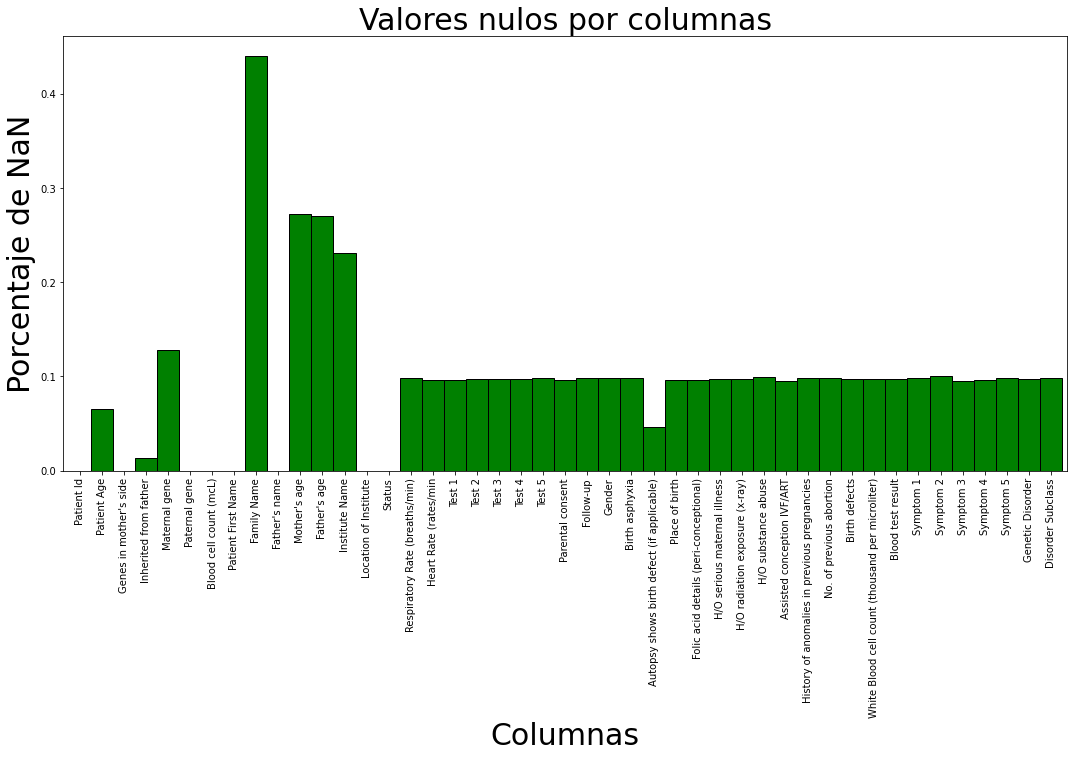

In [7]:
#Grafico valores nulos
nulos3 = df.isnull().mean()
axes = nulos3.plot.bar(title="Valores nulos por columnas",color="green",rot=90, width=1.0,figsize=(18,8),edgecolor = "black")
axes.title.set_size(30)
axes.set_xlabel("Columnas",fontsize=30)
axes.set_ylabel("Porcentaje de NaN",fontsize=30)


# Imputación de valores nulos

In [8]:
#En las varibles de test pareciera que hay varios varios nulos, quiero ver los valores que toman
tests = ['Test 1','Test 2','Test 3','Test 4','Test 5']
for col in tests:
    print(col)
    print(df[col].unique())
    print("\n")


Test 1
[ 0. nan]


Test 2
[nan  0.]


Test 3
[nan  0.]


Test 4
[ 1. nan]


Test 5
[ 0. nan]




In [9]:

def filtro(df):
    
    imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    
    #Voy a cambiar los NaN de los test por -99
    df['Test 1']=df['Test 1'].fillna(-99)
    df['Test 2']=df['Test 2'].fillna(-99)
    df['Test 3']=df['Test 3'].fillna(-99)
    df['Test 4']=df['Test 4'].fillna(-99)
    df['Test 5']=df['Test 5'].fillna(-99)
    
    df['Symptom 1']=df['Symptom 1'].fillna(-99)
    df['Symptom 2']=df['Symptom 2'].fillna(-99)
    df['Symptom 3']=df['Symptom 3'].fillna(-99)
    df['Symptom 4']=df['Symptom 4'].fillna(-99)
    df['Symptom 5']=df['Symptom 5'].fillna(-99)
    
    df["Birth asphyxia"] = df["Birth asphyxia"].replace("No record",np.NaN)
    df["Birth asphyxia"] = df["Birth asphyxia"].replace("Not available",np.NaN)
    df["Birth asphyxia"].fillna(df["Birth asphyxia"].mode()[0], inplace=True)
    
    
    df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
    df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)
    df["Autopsy shows birth defect (if applicable)"].fillna(df["Autopsy shows birth defect (if applicable)"].mode()[0], inplace=True)
    
    df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
    df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("-",np.NaN)
    df["H/O radiation exposure (x-ray)"].fillna(df["H/O radiation exposure (x-ray)"].mode()[0], inplace=True)

    df["H/O substance abuse"] = df["H/O substance abuse"].replace("Not applicable",np.NaN)
    df["H/O substance abuse"] = df["H/O substance abuse"].replace("-",np.NaN)
    df["H/O substance abuse"].fillna(df["H/O substance abuse"].mode()[0], inplace=True)
    
    df["Mother's age"]=df["Mother's age"].fillna(int(df["Mother's age"].mean()))
    df["Father's age"]=df["Father's age"].fillna(int(df["Father's age"].mean()))
    df["Patient Age"]=df["Patient Age"].fillna(int(df["Patient Age"].mean()))
    
    
    df["Disorder Subclass"].fillna(df["Disorder Subclass"].mode()[0], inplace=True)
    df["Inherited from father"].fillna( df["Inherited from father"].mode()[0], inplace=True)
    df["Maternal gene"].fillna( df["Maternal gene"].mode()[0], inplace=True)
    df["Respiratory Rate (breaths/min)"].fillna(df["Respiratory Rate (breaths/min)"].mode()[0], inplace=True)
    df["Heart Rate (rates/min"].fillna(df["Heart Rate (rates/min"].mode()[0], inplace=True)
    df["History of anomalies in previous pregnancies"].fillna(df["History of anomalies in previous pregnancies"].mode()[0], inplace=True)
    df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
    df["No. of previous abortion"].fillna(df["No. of previous abortion"].mode()[0], inplace=True)
    df["H/O serious maternal illness"].fillna(df["H/O serious maternal illness"].mode()[0], inplace=True)
    df["Genetic Disorder"].fillna(df["Genetic Disorder"].mode()[0], inplace=True)
    df["White Blood cell count (thousand per microliter)"].fillna(df["White Blood cell count (thousand per microliter)"].mode()[0], inplace=True)
    df["Assisted conception IVF/ART"].fillna(df["Assisted conception IVF/ART"].mode()[0], inplace=True)

        

    
    
    imp_cat= imp_cat.fit(df[['Blood test result',"Folic acid details (peri-conceptional)",
                                                "H/O radiation exposure (x-ray)","H/O substance abuse",
                                                "Follow-up","Birth defects"]])
    
    df[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]]=imp_cat.transform(df[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]])
    #Quitar valores como "-"
    df['H/O radiation exposure (x-ray)']=df['H/O radiation exposure (x-ray)'].replace('-','others')
    df['H/O substance abuse']=df['H/O substance abuse'].replace('-','others')
    #Decidí sobre algunas columnas que deseo remover
    df.drop(columns = ["Institute Name","Location of Institute", "Family Name","Father's name","Parental consent",
                        "Patient First Name","Patient Id",'Place of birth'], inplace=True)
        
        #df.dropna(inplace=True,axis=0)
filtro(df)   
    

In [10]:
df.isnull().mean().sort_values(ascending = False)

Patient Age                                         0.0
Autopsy shows birth defect (if applicable)          0.0
H/O serious maternal illness                        0.0
H/O radiation exposure (x-ray)                      0.0
H/O substance abuse                                 0.0
Assisted conception IVF/ART                         0.0
History of anomalies in previous pregnancies        0.0
No. of previous abortion                            0.0
Birth defects                                       0.0
White Blood cell count (thousand per microliter)    0.0
Blood test result                                   0.0
Symptom 1                                           0.0
Symptom 2                                           0.0
Symptom 3                                           0.0
Symptom 4                                           0.0
Symptom 5                                           0.0
Genetic Disorder                                    0.0
Folic acid details (peri-conceptional)          

In [11]:
df.shape

(21011, 37)

In [12]:
#Tengo dos posibles variables target
#df = df.dropna(subset= ['Genetic Disorder', 'Disorder Subclass'])
target1 = df['Genetic Disorder']
target2 = df['Disorder Subclass']
print(f"target 1 : {target1.unique()}")
print("\n")
print(f"target 2 : {target2.unique()}")
df

target 1 : ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']


target 2 : ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,34.0,41.0,Alive,Normal (30-60),Normal,0.0,-99.0,-99.0,1.0,0.0,High,Ambiguous,Yes,Yes,No,No,No,No,No,Yes,2.0,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,34.0,23.0,Deceased,Tachypnea,Normal,-99.0,0.0,0.0,1.0,0.0,High,Ambiguous,No,Yes,Yes,Yes,No,No,No,Yes,2.0,Multiple,5.522560,normal,1.0,-99.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Low,Ambiguous,Yes,Yes,Yes,No,Yes,No,Yes,Yes,4.0,Singular,12.000000,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,41.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,High,Male,Yes,No,No,Yes,No,No,Yes,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,41.0,Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Low,Male,Yes,Yes,No,Yes,No,No,Yes,No,4.0,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,-99.0,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21006,11.0,No,Yes,Yes,No,5.090495,46.0,41.0,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,-99.0,High,Ambiguous,No,Yes,Yes,No,No,No,No,Yes,2.0,Multiple,12.000000,normal,1.0,-99.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
21007,6.0,No,No,No,Yes,5.214750,34.0,38.0,Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Low,Male,Yes,Yes,No,Yes,No,No,Yes,Yes,3.0,Singular,7.086312,slightly abnormal,1.0,-99.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
21008,5.0,Yes,No,Yes,Yes,5.084831,28.0,28.0,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,High,Ambiguous,Yes,Yes,Yes,No,No,No,No,No,0.0,Multiple,7.924746,slightly abnormal,1.0,0.0,0.0,1.0,1.0,Multifactorial genetic inheritance disorders,Leigh syndrome
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Low,Ambiguous,Yes,Yes,Yes,No,No,No,Yes,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


A pesar de tener dos variables target, por temas de facilidad sería mejor tomar target 1 como el objetivo de predicción. 

In [13]:
a=df.groupby("Disorder Subclass")
a.mean()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Disorder Subclass,,,,,,,,,,,,,,,,
Alzheimer's,6.527027,4.901682,34.790541,42.722973,-10.033784,-11.371622,-8.027027,-7.108108,-7.358108,2.108108,7.907021,-5.202703,-8.520270,-4.439189,-7.790541,-5.777027
Cancer,7.271739,4.871431,34.597826,40.630435,-12.913043,-6.456522,-9.684783,-7.695652,-7.532609,2.010870,7.943964,-4.108696,-9.597826,-14.989130,-8.586957,-10.750000
Cystic fibrosis,6.876411,4.899041,34.496796,41.701251,-7.673482,-9.758010,-9.365273,-7.056149,-9.274641,2.007629,7.938387,-8.323467,-8.455294,-8.926762,-8.776015,-8.411962
Diabetes,6.806655,4.895089,34.445783,42.056799,-8.917384,-8.860585,-9.882960,-8.409065,-11.132530,2.011474,7.875039,-9.074584,-8.385542,-7.314400,-7.963282,-9.239243
Hemochromatosis,6.798606,4.891687,34.360960,41.772270,-10.199070,-9.508908,-9.125484,-7.675445,-9.278854,1.956623,7.923459,-7.384198,-9.386522,-9.058869,-8.360186,-10.945778
Leber's hereditary optic neuropathy,6.749588,4.897884,34.799012,41.762768,-11.090610,-9.622735,-8.970346,-9.049423,-9.948929,1.962109,7.873930,-9.016474,-8.517298,-5.537068,-7.474465,-9.271829
Leigh syndrome,6.962505,4.902508,34.301681,41.503376,-10.780348,-10.197242,-10.254130,-10.047263,-10.581238,2.010056,7.956524,-10.243069,-10.281712,-10.157449,-10.317627,-10.192932
Mitochondrial myopathy,6.904331,4.896271,34.334841,41.724893,-8.976440,-9.659686,-8.929319,-8.947644,-9.047120,2.019515,7.908396,-9.530462,-9.777963,-8.659448,-8.286054,-8.850547
Tay-Sachs,7.000000,4.901260,34.355390,41.769145,-8.869517,-8.869517,-9.642379,-7.959108,-8.869517,1.950558,7.893118,-8.076580,-9.005576,-8.139405,-9.063569,-7.915985


In [14]:
#Esta función la implementé para ver de a pares, ya que son muchos datos y queda una tabla muy grande
def correlation(x,y):
    x.unique()
    y.unique()
    crosstab = pd.crosstab(x, y)
    X2 = stats.chi2_contingency(crosstab, correction=False)[0]
    N = crosstab.sum().sum()
    k = x.nunique()
    r = y.nunique()
    V = np.sqrt((X2/N)/min(k-1,r-1))
    return V

correlation(df["Disorder Subclass"],df["Genetic Disorder"])

0.8740138244160297

In [15]:

import association_metrics as am

df = df.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)


cramersv = am.CramersV(df) 
# La función de arriba me retorna una matriz cuadrada con los valores de Cramer's V
cramersv.fit()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
Genes in mother's side,1.000000,0.007663,0.091286,0.008807,0.000212,0.000637,0.002448,0.007872,0.003701,0.006609,0.002363,0.001026,0.001064,0.001726,0.009563,0.003176,0.007145,0.001539,0.015074,0.088317,0.189467
Inherited from father,0.007663,1.000000,0.008268,0.091935,0.013656,0.008811,0.012125,0.003476,0.001883,0.009549,0.005316,0.001343,0.004074,0.004483,0.002410,0.011558,0.011531,0.011123,0.012932,0.087186,0.176740
Maternal gene,0.091286,0.008268,1.000000,0.009719,0.004865,0.002397,0.007798,0.001373,0.021455,0.005371,0.010989,0.003642,0.000004,0.003553,0.001575,0.011426,0.012061,0.013443,0.008916,0.068500,0.162105
Paternal gene,0.008807,0.091935,0.009719,1.000000,0.014619,0.000824,0.006560,0.002714,0.007695,0.006170,0.012779,0.002084,0.001459,0.000129,0.003363,0.004339,0.000602,0.000512,0.009711,0.070453,0.159090
Status,0.000212,0.013656,0.004865,0.014619,1.000000,0.009790,0.006740,0.002141,0.013599,0.001362,0.415336,0.002649,0.000873,0.000107,0.000794,0.002663,0.005448,0.004001,0.010737,0.005461,0.018099
Respiratory Rate (breaths/min),0.000637,0.008811,0.002397,0.000824,0.009790,1.000000,0.012974,0.002299,0.013253,0.000619,0.003488,0.011914,0.009711,0.001377,0.000284,0.001668,0.019568,0.007807,0.010765,0.016309,0.017363
Heart Rate (rates/min,0.002448,0.012125,0.007798,0.006560,0.006740,0.012974,1.000000,0.000300,0.004169,0.002359,0.003445,0.008058,0.015849,0.003591,0.002941,0.001859,0.013266,0.002074,0.010837,0.012220,0.026921
Follow-up,0.007872,0.003476,0.001373,0.002714,0.002141,0.002299,0.000300,1.000000,0.010962,0.002532,0.003596,0.007882,0.012228,0.004013,0.005324,0.014947,0.002245,0.009900,0.015109,0.013614,0.028866
Gender,0.003701,0.001883,0.021455,0.007695,0.013599,0.013253,0.004169,0.010962,1.000000,0.018159,0.015228,0.012179,0.028939,0.004086,0.007293,0.002734,0.012765,0.005052,0.015313,0.011097,0.021289
Birth asphyxia,0.006609,0.009549,0.005371,0.006170,0.001362,0.000619,0.002359,0.002532,0.018159,1.000000,0.007660,0.004355,0.002072,0.008564,0.001645,0.001965,0.012050,0.003021,0.006997,0.011424,0.020815


In [16]:
data = df.reset_index(drop=True)

In [81]:


def encode(data):
    encoder = data.copy()
    Encode_Func = LabelEncoder()

    encoder["Maternal gene"] = Encode_Func.fit_transform(encoder["Maternal gene"])
    encoder["Genes in mother's side"] = Encode_Func.fit_transform(encoder["Genes in mother's side"])
    encoder["Inherited from father"] = Encode_Func.fit_transform(encoder["Inherited from father"])
    encoder["Paternal gene"] = Encode_Func.fit_transform(encoder["Paternal gene"])
    encoder["Status"] = Encode_Func.fit_transform(encoder["Status"])
    encoder["Respiratory Rate (breaths/min)"] = Encode_Func.fit_transform(encoder["Respiratory Rate (breaths/min)"])
    encoder["Heart Rate (rates/min"] = Encode_Func.fit_transform(encoder["Heart Rate (rates/min"])
    encoder["Follow-up"] = Encode_Func.fit_transform(encoder["Follow-up"])
    encoder["Gender"] = Encode_Func.fit_transform(encoder["Gender"])

    encoder["Birth asphyxia"] = Encode_Func.fit_transform(encoder["Birth asphyxia"])
    encoder["Autopsy shows birth defect (if applicable)"] = Encode_Func.fit_transform(encoder["Autopsy shows birth defect (if applicable)"])
    encoder["Folic acid details (peri-conceptional)"] = Encode_Func.fit_transform(encoder["Folic acid details (peri-conceptional)"])

    encoder["H/O serious maternal illness"] = Encode_Func.fit_transform(encoder["H/O serious maternal illness"])
    encoder["H/O radiation exposure (x-ray)"] = Encode_Func.fit_transform(encoder["H/O radiation exposure (x-ray)"])
    encoder["H/O substance abuse"] = Encode_Func.fit_transform(encoder["H/O substance abuse"])

    encoder["Assisted conception IVF/ART"] = Encode_Func.fit_transform(encoder["Assisted conception IVF/ART"])
    encoder["History of anomalies in previous pregnancies"] = Encode_Func.fit_transform(encoder["History of anomalies in previous pregnancies"])
    encoder["Birth defects"] = Encode_Func.fit_transform(encoder["Birth defects"])
    encoder["Blood test result"] = Encode_Func.fit_transform(encoder["Blood test result"])
    encoder["Genetic Disorder"] = Encode_Func.fit_transform(encoder["Genetic Disorder"])
    encoder["Disorder Subclass"] = Encode_Func.fit_transform(encoder["Disorder Subclass"])

    return encoder
encoder=encode(data)
encoder.shape

(21011, 37)

In [18]:
encoder=encoder.astype("float32")
encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21011 entries, 0 to 21010
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       21011 non-null  float32
 1   Genes in mother's side                            21011 non-null  float32
 2   Inherited from father                             21011 non-null  float32
 3   Maternal gene                                     21011 non-null  float32
 4   Paternal gene                                     21011 non-null  float32
 5   Blood cell count (mcL)                            21011 non-null  float32
 6   Mother's age                                      21011 non-null  float32
 7   Father's age                                      21011 non-null  float32
 8   Status                                            21011 non-null  float32
 9   Respiratory Rate 

In [69]:
encoder.shape
train=encoder
train["Genetic Disorder"].unique()

array([0., 1., 2.], dtype=float32)

# Ahora haré toda la limpieza con el dataset de test para hacer el split 


In [20]:
df2.shape

(9463, 43)

In [21]:
df2.isnull().mean().sort_values(ascending = False)

Family Name                                         0.984466
Maternal gene                                       0.404629
Heart Rate (rates/min                               0.318504
Respiratory Rate (breaths/min)                      0.318398
Institute Name                                      0.229314
Inherited from father                               0.075769
History of anomalies in previous pregnancies        0.018282
Place of birth                                      0.018282
Folic acid details (peri-conceptional)              0.018282
H/O serious maternal illness                        0.018282
H/O radiation exposure (x-ray)                      0.018282
H/O substance abuse                                 0.018282
Assisted conception IVF/ART                         0.018282
Patient Id                                          0.018282
No. of previous abortion                            0.018282
Birth asphyxia                                      0.018282
Birth defects           

In [22]:
def filtro(df2):
    
    imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    
    #Voy a cambiar los NaN de los test por -99
    df2['Test 1']=df2['Test 1'].fillna(-99)
    df2['Test 2']=df2['Test 2'].fillna(-99)
    df2['Test 3']=df2['Test 3'].fillna(-99)
    df2['Test 4']=df2['Test 4'].fillna(-99)
    df2['Test 5']=df2['Test 5'].fillna(-99)
    
    df2['Symptom 1']=df2['Symptom 1'].fillna(-99)
    df2['Symptom 2']=df2['Symptom 2'].fillna(-99)
    df2['Symptom 3']=df2['Symptom 3'].fillna(-99)
    df2['Symptom 4']=df2['Symptom 4'].fillna(-99)
    df2['Symptom 5']=df2['Symptom 5'].fillna(-99)
    
    df2["Birth asphyxia"] = df2["Birth asphyxia"].replace("No record",np.NaN)
    df2["Birth asphyxia"] = df2["Birth asphyxia"].replace("Not available",np.NaN)
    df2["Birth asphyxia"].fillna(df2["Birth asphyxia"].mode()[0], inplace=True)
    
    
    df2["Autopsy shows birth defect (if applicable)"] = df2["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
    df2["Autopsy shows birth defect (if applicable)"] = df2["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)
    df2["Autopsy shows birth defect (if applicable)"].fillna(df2["Autopsy shows birth defect (if applicable)"].mode()[0], inplace=True)
    
    df2["H/O radiation exposure (x-ray)"] = df2["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
    df2["H/O radiation exposure (x-ray)"] = df2["H/O radiation exposure (x-ray)"].replace("-",np.NaN)
    df2["H/O radiation exposure (x-ray)"].fillna(df2["H/O radiation exposure (x-ray)"].mode()[0], inplace=True)

    df2["H/O substance abuse"] = df2["H/O substance abuse"].replace("Not applicable",np.NaN)
    df2["H/O substance abuse"] = df2["H/O substance abuse"].replace("-",np.NaN)
    df2["H/O substance abuse"].fillna(df2["H/O substance abuse"].mode()[0], inplace=True)
    
    df2["Mother's age"]=df2["Mother's age"].fillna(int(df2["Mother's age"].mean()))
    df2["Father's age"]=df2["Father's age"].fillna(int(df2["Father's age"].mean()))
    df2["Patient Age"]=df2["Patient Age"].fillna(int(df2["Patient Age"].mean()))
    
    
   
    df2["Inherited from father"].fillna( df2["Inherited from father"].mode()[0], inplace=True)
    df2["Maternal gene"].fillna( df2["Maternal gene"].mode()[0], inplace=True)
    df2["Respiratory Rate (breaths/min)"].fillna(df2["Respiratory Rate (breaths/min)"].mode()[0], inplace=True)
    df2["Heart Rate (rates/min"].fillna(df2["Heart Rate (rates/min"].mode()[0], inplace=True)
    df2["History of anomalies in previous pregnancies"].fillna(df2["History of anomalies in previous pregnancies"].mode()[0], inplace=True)
    df2["Gender"].fillna(df2["Gender"].mode()[0], inplace=True)
    df2["No. of previous abortion"].fillna(df2["No. of previous abortion"].mode()[0], inplace=True)
    df2["H/O serious maternal illness"].fillna(df2["H/O serious maternal illness"].mode()[0], inplace=True)
    
    df2["White Blood cell count (thousand per microliter)"].fillna(df2["White Blood cell count (thousand per microliter)"].mode()[0], inplace=True)
    df2["Assisted conception IVF/ART"].fillna(df2["Assisted conception IVF/ART"].mode()[0], inplace=True)

        

    
    
    imp_cat= imp_cat.fit(df2[['Blood test result',"Folic acid details (peri-conceptional)",
                                                "H/O radiation exposure (x-ray)","H/O substance abuse",
                                                "Follow-up","Birth defects"]])
    
    df2[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]]=imp_cat.transform(df2[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]])
    #Quitar valores como "-"
    df2['H/O radiation exposure (x-ray)']=df2['H/O radiation exposure (x-ray)'].replace('-','others')
    df2['H/O substance abuse']=df2['H/O substance abuse'].replace('-','others')
    #Decidí sobre algunas columnas que deseo remover
    df2.drop(columns = ["Institute Name","Location of Institute", "Family Name","Father's name","Parental consent",
                        "Patient First Name","Patient Id",'Place of birth'], inplace=True)
        
        #df2.dropna(inplace=True,axis=0)
filtro(df2)   
    

In [23]:
df2.isnull().mean().sort_values(ascending = False)

Genes in mother's side                              0.018282
Paternal gene                                       0.018282
Blood cell count (mcL)                              0.018282
Status                                              0.018282
Patient Age                                         0.000000
Birth defects                                       0.000000
H/O radiation exposure (x-ray)                      0.000000
H/O substance abuse                                 0.000000
Assisted conception IVF/ART                         0.000000
History of anomalies in previous pregnancies        0.000000
No. of previous abortion                            0.000000
Blood test result                                   0.000000
White Blood cell count (thousand per microliter)    0.000000
Folic acid details (peri-conceptional)              0.000000
Symptom 1                                           0.000000
Symptom 2                                           0.000000
Symptom 3               

In [24]:
#En el de test habían unos nulos adicionales entonces los removí a mano 
df2["Genes in mother's side"].fillna(df2["Genes in mother's side"].mode()[0], inplace=True)
df2["Blood cell count (mcL)"].fillna(df2["Blood cell count (mcL)"].mode()[0], inplace=True)
df2["Paternal gene"].fillna(df2["Paternal gene"].mode()[0], inplace=True)
df2["Status"].fillna(df2["Status"].mode()[0], inplace=True)


In [25]:
df2.isnull().mean().sort_values(ascending = False)

Patient Age                                         0.0
No. of previous abortion                            0.0
Folic acid details (peri-conceptional)              0.0
H/O serious maternal illness                        0.0
H/O radiation exposure (x-ray)                      0.0
H/O substance abuse                                 0.0
Assisted conception IVF/ART                         0.0
History of anomalies in previous pregnancies        0.0
Birth defects                                       0.0
Birth asphyxia                                      0.0
White Blood cell count (thousand per microliter)    0.0
Blood test result                                   0.0
Symptom 1                                           0.0
Symptom 2                                           0.0
Symptom 3                                           0.0
Symptom 4                                           0.0
Autopsy shows birth defect (if applicable)          0.0
Gender                                          

In [26]:
data2 = df2.reset_index(drop=True)
def encode(data2):
    encoder2 = data2.copy()
    Encode_func = LabelEncoder()

    encoder2["Maternal gene"] = Encode_func.fit_transform(encoder2["Maternal gene"])
    encoder2["Genes in mother's side"] = Encode_func.fit_transform(encoder2["Genes in mother's side"])
    encoder2["Inherited from father"] = Encode_func.fit_transform(encoder2["Inherited from father"])
    encoder2["Paternal gene"] = Encode_func.fit_transform(encoder2["Paternal gene"])
    encoder2["Status"] = Encode_func.fit_transform(encoder2["Status"])
    encoder2["Respiratory Rate (breaths/min)"] = Encode_func.fit_transform(encoder2["Respiratory Rate (breaths/min)"])
    encoder2["Heart Rate (rates/min"] = Encode_func.fit_transform(encoder2["Heart Rate (rates/min"])
    encoder2["Follow-up"] = Encode_func.fit_transform(encoder2["Follow-up"])
    encoder2["Gender"] = Encode_func.fit_transform(encoder2["Gender"])

    encoder2["Birth asphyxia"] = Encode_func.fit_transform(encoder2["Birth asphyxia"])
    encoder2["Autopsy shows birth defect (if applicable)"] = Encode_func.fit_transform(encoder2["Autopsy shows birth defect (if applicable)"])
    encoder2["Folic acid details (peri-conceptional)"] = Encode_func.fit_transform(encoder2["Folic acid details (peri-conceptional)"])

    encoder2["H/O serious maternal illness"] = Encode_func.fit_transform(encoder2["H/O serious maternal illness"])
    encoder2["H/O radiation exposure (x-ray)"] = Encode_func.fit_transform(encoder2["H/O radiation exposure (x-ray)"])
    encoder2["H/O substance abuse"] = Encode_func.fit_transform(encoder2["H/O substance abuse"])

    encoder2["Assisted conception IVF/ART"] = Encode_func.fit_transform(encoder2["Assisted conception IVF/ART"])
    encoder2["History of anomalies in previous pregnancies"] = Encode_func.fit_transform(encoder2["History of anomalies in previous pregnancies"])
    encoder2["Birth defects"] = Encode_func.fit_transform(encoder2["Birth defects"])
    encoder2["Blood test result"] = Encode_func.fit_transform(encoder2["Blood test result"])
    #encoder2["Genetic Disorder"] = Encode_func.fit_transform(encoder2["Genetic Disorder"])
    #encoder2["Disorder Subclass"] = Encode_func.fit_transform(encoder2["Disorder Subclass"])

    return encoder2
encoder2=encode(data2)
encoder2.shape


(9463, 35)

In [27]:
encoder2=encoder2.astype("float32")
encoder2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       9463 non-null   float32
 1   Genes in mother's side                            9463 non-null   float32
 2   Inherited from father                             9463 non-null   float32
 3   Maternal gene                                     9463 non-null   float32
 4   Paternal gene                                     9463 non-null   float32
 5   Blood cell count (mcL)                            9463 non-null   float32
 6   Mother's age                                      9463 non-null   float32
 7   Father's age                                      9463 non-null   float32
 8   Status                                            9463 non-null   float32
 9   Respiratory Rate (b

In [30]:
encoder2.shape
test=encoder2
test

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,0.0,1.0,0.0,0.0,4.981655,38.0,61.0,0.0,2.0,1.0,0.0,-99.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,-99.000000,4.0,1.0,1.0,1.0,1.0,1.0
1,10.0,1.0,0.0,1.0,1.0,5.118889,33.0,53.0,0.0,1.0,0.0,0.0,0.0,-99.0,1.0,-99.0,2.0,3.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,-99.0,1.0,8.179584,3.0,0.0,0.0,0.0,1.0,0.0
2,5.0,0.0,0.0,0.0,0.0,4.876204,48.0,60.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,-99.000000,4.0,0.0,0.0,1.0,1.0,0.0
3,13.0,0.0,1.0,1.0,0.0,4.687767,25.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,2.0,-99.0,2.0,6.884071,3.0,1.0,0.0,1.0,0.0,1.0
4,5.0,0.0,0.0,1.0,1.0,5.152362,41.0,38.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,-99.0,1.0,6.195179,3.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,7.0,1.0,0.0,1.0,0.0,4.120469,34.0,41.0,1.0,1.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-99.0,2.0,-99.000000,0.0,-99.0,-99.0,-99.0,-99.0,-99.0
9459,7.0,1.0,0.0,1.0,0.0,4.120469,34.0,41.0,1.0,1.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-99.0,2.0,-99.000000,0.0,-99.0,-99.0,-99.0,-99.0,-99.0
9460,7.0,1.0,0.0,1.0,0.0,4.120469,34.0,41.0,1.0,1.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-99.0,2.0,-99.000000,0.0,-99.0,-99.0,-99.0,-99.0,-99.0
9461,7.0,1.0,0.0,1.0,0.0,4.120469,34.0,41.0,1.0,1.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-99.0,2.0,-99.000000,0.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [31]:
test.equals(train)

False

# Split

In [70]:
#Por ahora voy a hacer solo el Genetic disorder ya que son menos variables
X=train.drop("Genetic Disorder",axis=1)
y=train["Genetic Disorder"]
y.unique()

array([0., 1., 2.], dtype=float32)

In [71]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
print("X TRAIN SHAPE: ",X_train.shape)
print("X TEST SHAPE: ",X_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)


X TRAIN SHAPE:  (14707, 36)
X TEST SHAPE:  (6304, 36)
Y TRAIN SHAPE:  (14707,)
Y TEST SHAPE:  (6304,)


# Predicción con Logistic Regression, KNN y Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver="liblinear").fit(X_train,y_train)
knn = KNeighborsClassifier().fit(X_train,y_train)
arbol = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)


#Ahora las predicciones 
lrpre=lr.predict(X_test)
knnpre=knn.predict(X_test)
arbolpre=arbol.predict(X_test)
#Recordar que y_test son los datos realesss


# Métricas

In [101]:
#Ahora algunas métricas 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

a=accuracy_score(y_test,lrpre)
b=accuracy_score(y_test,knnpre)
c=accuracy_score(y_test,arbolpre)
print("Usando Accuracy Score las métricas fueron de: ")
print("-Logistic Regresion: {:.2f}".format(a))
print("-KNN: {:.2f}".format(b))
print("-Tree Decision: {:.2f}".format(c))

Usando Accuracy Score las métricas fueron de: 
-Logistic Regresion: 0.71
-KNN: 0.61
-Tree Decision: 0.84


De lo anterior podemos notar que de acuerdo a la métrica de accuracy el mejor modelo es el árbol de decisión 

In [102]:
a,b,c=recall_score(y_test,lrpre,average=None)
d,e,f=recall_score(y_test,knnpre,average=None)
g,h,i=recall_score(y_test,arbolpre,average=None)
print("Usando Recall Score (True positive rate) las métricas fueron de: ")
print("-Logistic Regresion: {:.2f},{:.2f},{:.2f}".format(a,b,c))
print("-KNN: {:.2f},{:.2f},{:.2f}".format(d,e,f))
print("-Tree Decision: {:.2f},{:.2f},{:.2f}".format(g,h,i))

Usando Accuracy Score las métricas fueron de: 
-Logistic Regresion: 0.95,0.03,0.50
-KNN: 0.88,0.12,0.32
-Tree Decision: 0.86,0.79,0.82


In [103]:

a,b,c=recall_score(y_test, lrpre, pos_label= 0,average=None)
d,e,f=recall_score(y_test, knnpre, pos_label= 0,average=None)
g,h,i=recall_score(y_test, arbolpre, pos_label= 0,average=None)
print("Usando Recall Score (True negative rate) las métricas fueron de: ")
print("-Logistic Regresion: {:.2f},{:.2f},{:.2f}".format(a,b,c))
print("-KNN: {:.2f},{:.2f},{:.2f}".format(d,e,f))
print("-Tree Decision: {:.2f},{:.2f},{:.2f}".format(g,h,i))

Usando Recall Score (True negative rate) las métricas fueron de: 
-Logistic Regresion: 0.95,0.03,0.50
-KNN: 0.88,0.12,0.32
-Tree Decision: 0.86,0.79,0.82


C:\Users\USA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
C:\Users\USA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
C:\Users\USA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


De lo anterior podemos evidenciar que no tenemos un modelo desbalanceado puesto que ambos Recall tanto para TP y FP tenemos los mismos resultados. 